In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import PIL
import cv2


In [2]:
data_url='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir=tf.keras.utils.get_file('flower_photos',origin=data_url, cache_dir='D:/DSP',untar=True)

In [3]:
data_dir

'D:/DSP\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('D:/DSP/datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('D:/DSP/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('D:/DSP/datasets/flo

In [6]:
image_count=len(list(data_dir.glob('*/*.jpg')))

In [7]:
image_count

3670

In [8]:
roses=len(list(data_dir.glob('*roses/*')))
roses
roses1=list(data_dir.glob('*roses/*'))
roses1

[WindowsPath('D:/DSP/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('D:/DSP/datas

In [9]:
tulips=len(list(data_dir.glob('*tulips/*')))
tulips

799

In [10]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
flowers_images_list={
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [12]:
flowers_images_list['roses']

[WindowsPath('D:/DSP/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('D:/DSP/datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('D:/DSP/datas

In [13]:
flowers_labels_list={
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips' :4,
    
    
}

In [14]:
flowers_labels_list['dandelion']

2

In [15]:
str(flowers_images_list['roses'][0])

'D:\\DSP\\datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [16]:
img=cv2.imread(str(flowers_images_list['roses'][0]))

In [17]:
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [18]:
img.shape

(240, 179, 3)

In [19]:
cv2.resize(img,(100,100)).shape

(100, 100, 3)

In [20]:
x,y=[],[]
for flower_name,images in flowers_images_list.items():
    print(flower_name)
    print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [79]:
x,y=[],[]
for flower_name,images in flowers_images_list.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_labels_list[flower_name])
        

In [22]:
y[:5]

[0, 0, 0, 0, 0]

In [23]:
x[0]
 

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [24]:
x=np.array(x)
y=np.array(y)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [26]:
len(x_train)

2752

In [27]:
len(x_test)

918

In [28]:
x_train_scaled=x_train / 255
x_test_scaled=x_test / 255

In [30]:
num_classes=5
model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
    
    
])
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(x_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 37s 421ms/step - loss: 1.2941 - accuracy: 0.4433
Epoch 2/30
86/86 [==============================] - 38s 441ms/step - loss: 0.9592 - accuracy: 0.6279
Epoch 3/30
86/86 [==============================] - 40s 463ms/step - loss: 0.8106 - accuracy: 0.6817
Epoch 4/30
86/86 [==============================] - 36s 419ms/step - loss: 0.6463 - accuracy: 0.7536
Epoch 5/30
86/86 [==============================] - 37s 426ms/step - loss: 0.4484 - accuracy: 0.8325
Epoch 6/30
86/86 [==============================] - 36s 421ms/step - loss: 0.3004 - accuracy: 0.9044
Epoch 7/30
86/86 [==============================] - 37s 424ms/step - loss: 0.1947 - accuracy: 0.9357
Epoch 8/30
86/86 [==============================] - 37s 428ms/step - loss: 0.1000 - accuracy: 0.9717
Epoch 9/30
86/86 [==============================] - 39s 451ms/step - loss: 0.0684 - accuracy: 0.9844
Epoch 10/30
86/86 [==============================] - 39s 454ms/step - loss: 0.0557 - accura

In [76]:
model.evaluate(x_test_scaled,y_test)
predictions=model.predict(x_test_scaled)
predictions

29/29 [==============================] - 2s 68ms/step


array([[  2.4329576,  21.862562 ,  -1.0653768, -11.733787 ,  -8.807959 ],
       [ 14.973718 ,   2.8816724, -10.862948 ,  -3.9337928,   2.5463274],
       [ -2.427735 ,  -2.9758148,   6.2522187, -12.441098 ,  -3.2258377],
       ...,
       [  5.198572 ,  -6.0213194, -10.949164 ,   9.010845 ,   4.0595074],
       [  3.3409276,  -1.3399364,   2.9015093,  -6.1756186,  -4.251345 ],
       [ -1.2898575, -14.343871 ,   1.8434821,   7.7815375,   4.425982 ]],
      dtype=float32)

In [32]:
score=tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([3.6461152e-09, 1.0000000e+00, 1.1028663e-10, 2.5662060e-15,
       4.7858829e-14], dtype=float32)>

In [33]:
np.argmax(score)

1

In [34]:
y_test[0]

1

In [67]:
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.2),])

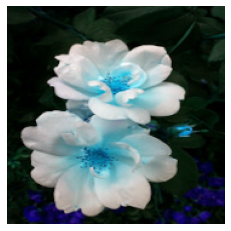

In [57]:
plt.axis('off')
plt.imshow(x[0])

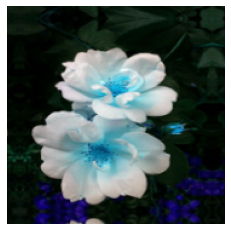

In [65]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype('uint8'))

In [71]:
data_augmentation1=keras.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.6),])

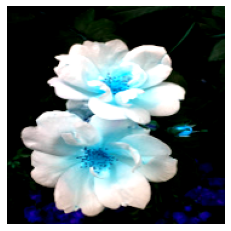

In [72]:
plt.axis('off')
plt.imshow(data_augmentation1(x)[0].numpy().astype('uint8'))

In [74]:
data_augmentation2=keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.6),])

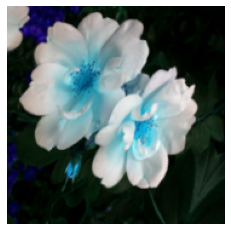

In [75]:
plt.axis('off')
plt.imshow(data_augmentation2(x)[0].numpy().astype('uint8'))

In [82]:
data_augmentation_final=keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
                                                
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    
])

In [84]:
num_classes=5
model=Sequential([
    data_augmentation_final,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
    
    
])
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(x_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 46s 476ms/step - loss: 1.2381 - accuracy: 0.4753
Epoch 2/30
86/86 [==============================] - 40s 468ms/step - loss: 1.0018 - accuracy: 0.6061
Epoch 3/30
86/86 [==============================] - 40s 464ms/step - loss: 0.8970 - accuracy: 0.6559
Epoch 4/30
86/86 [==============================] - 39s 458ms/step - loss: 0.8443 - accuracy: 0.6733
Epoch 5/30
86/86 [==============================] - 40s 465ms/step - loss: 0.7745 - accuracy: 0.6999
Epoch 6/30
86/86 [==============================] - 40s 466ms/step - loss: 0.7358 - accuracy: 0.7217
Epoch 7/30
86/86 [==============================] - 43s 498ms/step - loss: 0.7173 - accuracy: 0.7340
Epoch 8/30
86/86 [==============================] - 42s 493ms/step - loss: 0.6612 - accuracy: 0.7504
Epoch 9/30
86/86 [==============================] - 41s 482ms/step - loss: 0.6265 - accuracy: 0.7638
Epoch 10/30
86/86 [==============================] - 43s 501ms/step - loss: 0.5752 - accura

In [85]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 2s 74ms/step - loss: 1.4200 - accuracy: 0.7081


[1.419960618019104, 0.7080609798431396]